# SVM Ejercicio - Hiperplano de Margen Máximo - Caso Lineal


In [1]:
import sklearn
from sklearn import datasets
from sklearn import svm
#from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Conjuntos Linealmente Separables:

In [2]:
N=1000  # total de datos a generar.
noisy_data = sklearn.datasets.make_blobs(n_samples=N, n_features=2, centers=[(-4,-4),(4,4)], cluster_std=1.0, random_state=10)  # centers=2

In [3]:
X, Y = noisy_data
Y = Y.reshape(Y.shape[0],1)
print(X.shape)
print(Y.shape)

(1000, 2)
(1000, 1)


In [4]:
print(X[0:6,:])

[[ 4.52703933  2.91738139]
 [ 4.39524952  3.50592185]
 [-3.01340218 -3.97177263]
 [-4.19410253 -5.74673584]
 [ 3.23864646  4.05911423]
 [-4.6399626  -3.68616948]]


In [ ]:
print(Y[0:6,0])

[0 1 1 0 0 0]


In [5]:
sns.set(rc={'figure.figsize':(9,7)})   # (width, height) - definiendo el tamaño de las gráficas.

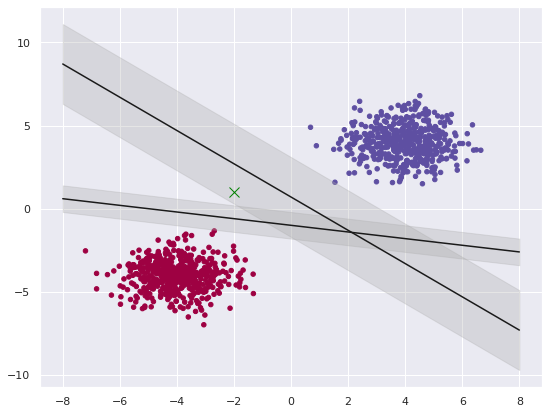

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, s=20, cmap=plt.cm.Spectral);  # Puntos de ambas clases

xhs = np.linspace(-8, 8)   # Algunas rectas-clasificadores lineales: Hiperplano/margen Separador
for m, b, d in [(-1, 0.7, 2.4),  (-0.2, -1, 0.8)]:
    yhs = m * xhs + b
    plt.plot(xhs, yhs, '-k');
    plt.fill_between(xhs, yhs - d, yhs + d, edgecolor='none',color='#AAAAAA', alpha=0.3);  # márgenes máximos de cada HiperplanoSeparador

plt.plot([-2], [1], 'x', color='green',  markersize=10);  # Un punto a clasificar

### Dibujemos algunas rectas que separen ambas clases:

In [8]:
model = svm.SVC(kernel='linear', C=1E10)
model.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Una función para visualizar los hiperplanos separadores e identicar los vectores de soporte:

In [25]:
def plot_svc_decision_function(model, ax=None, plot_support=True):    

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=400, facecolors='yellow', alpha=0.3);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Grafiquemos ahora los límites del Hiperplano Separador/Margen Máximo:

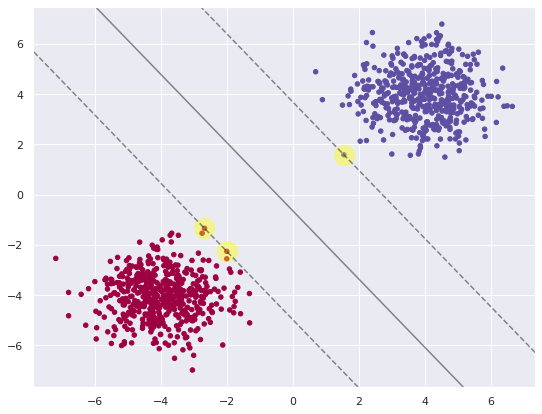

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, cmap=plt.cm.Spectral)
plot_svc_decision_function(model);

Los vectores de soporte indicados en la imagen son los siguientes:

In [15]:
model.support_vectors_

array([[-2.69151285, -1.33742253],
       [-2.01491541, -2.25518585],
       [ 1.53777742,  1.58876843]])

Una monería para gráficas:

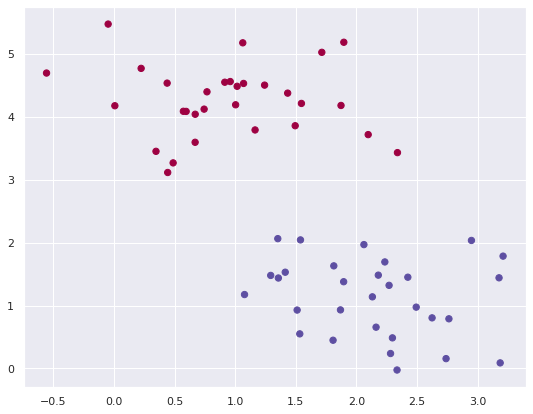

In [17]:
X, y = sklearn.datasets.make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

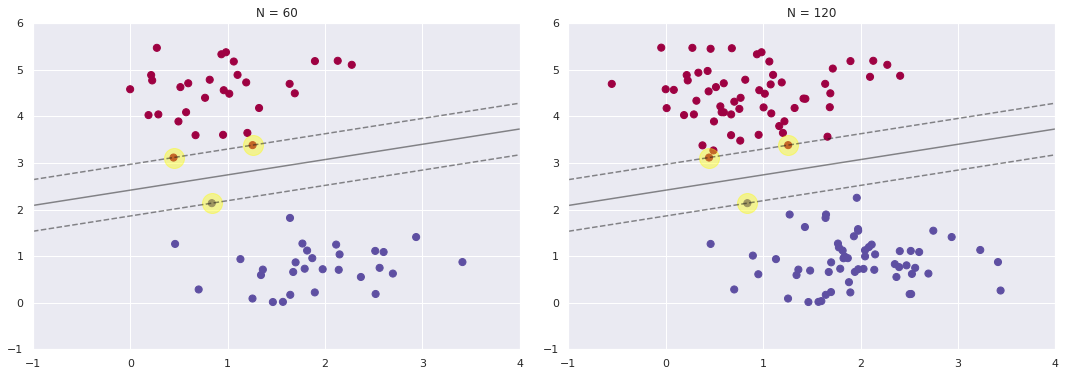

In [18]:
def plot_svm(N=10, ax=None):
    X, y = sklearn.datasets.make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = svm.SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Spectral)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# Caso: conjuntos Linealmente No-Seprables:

In [19]:
N=1000
noisy_data2 = sklearn.datasets.make_blobs(n_samples=N, n_features=2, centers=[(-4,-4),(4,4)], cluster_std=2.0, random_state=10)  

In [20]:
X2, Y2 = noisy_data2
Y2 = Y2.reshape(Y2.shape[0],1)

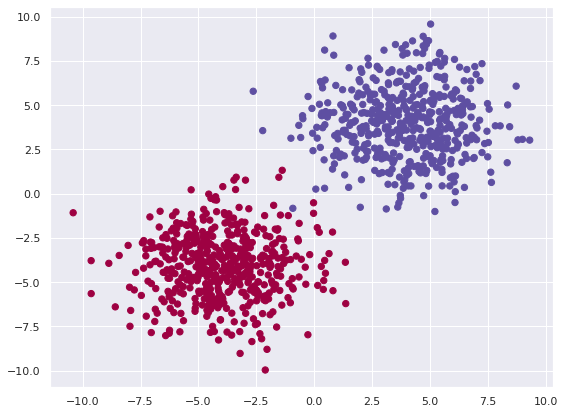

In [21]:
plt.scatter(X2[:,0], X2[:,1], c=Y2, s=40, cmap=plt.cm.Spectral); 

In [49]:
C =  10

In [50]:
modelnol = svm.SVC(kernel='linear', C=C)
modelnol.fit(X2, Y2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

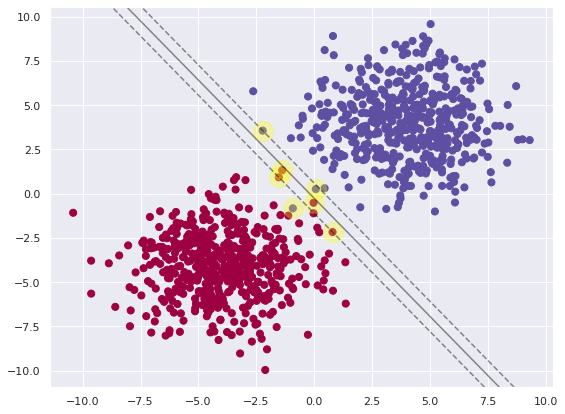

In [51]:
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, s=50, cmap=plt.cm.Spectral)
plot_svc_decision_function(modelnol)

In [52]:
modelnol.support_vectors_

array([[ 0.78940733, -2.16508212],
       [-1.38302569,  1.32515495],
       [-0.02983082, -0.5103717 ],
       [-1.52758935,  0.93065016],
       [ 0.06759049,  0.26244977],
       [-2.22528989,  3.56597463],
       [-0.92444516, -0.82246314]])

### Seleccionado los mejores parámetros - C y Gamma:

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [29]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

In [30]:
C_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [32]:
gamma_range

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [34]:
param_grid = dict(gamma=gamma_range, C=C_range)

In [36]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [37]:
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)

In [38]:
grid.fit(X2, Y2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [39]:
print("Los mejores parametros son %s con un with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.01, 'gamma': 1e-09} with a score of 1.00
